# **Basic Python**

22b2439 Ajinkya Mawal CCP

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [126]:
def F(n):
    # Start coding
    for i in range(n):
        space = '-'*(n-i-1)
        sequence = ''
        for j in range(2*i+1):
            letter = chr(ord('A')+ abs(j-i))
            sequence += letter
        print(space + sequence + space)
    pass

# Tests
F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [127]:
def F(d : dict):
    # Start coding
    print("Sorted by keys (ascending):")
    for key in sorted(d.keys()):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")

    print("\nSorted by x values (descending):")
    for key, (x, y) in sorted(d.items(), key=lambda item: item[1][0], reverse=True):
        print(f"-{key}-, -{x}-, -{y}-")

    print("\nSorted by y values (ascending):")
    for key, (x, y) in sorted(d.items(), key=lambda item: item[1][1]):
        print(f"-{key}-, -{x}-, -{y}-")
    pass

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Sorted by keys (ascending):
-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-

Sorted by x values (descending):
-4-, -2-, -3-
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-

Sorted by y values (ascending):
-1-, -1-, -2-
-5-, --4-, -3-
-4-, -2-, -3-
-2-, --1-, -4-
Sorted by keys (ascending):
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-

Sorted by x values (descending):
-5-, -9-, --10-
--8-, -4-, -2-
-7-, -2-, -1-
-6-, --3-, -4-

Sorted by y values (ascending):
-5-, -9-, --10-
-7-, -2-, -1-
--8-, -4-, -2-
-6-, --3-, -4-


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


In [128]:
import csv

# Helper Function: Convert CSV to a List of Dictionaries
def csv_to_dict(file_path):
    rows = []
    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)  # Automatically uses headers as keys
        for row in reader:
            rows.append(dict(row))  # Convert each row into a dictionary
    return rows

file_path = r"C:\Users\ajinkya\OneDrive - Indian Institute of Technology Bombay\Desktop\Winter'24\student_records.csv"

#### 2.a: open the student_records.csv file and print out the first 10 rows

In [129]:
#TODO : first 10 rows
def fn2_a(file_path):
    data = csv_to_dict(file_path)
    print("First 10 rows:")
    for row in data[:10]:
        print(row)

fn2_a(file_path)

First 10 rows:
{'roll_number': '588946', 'department': 'MA', 'credit': '3', 'course_name': 'EC250', 'course_type': 'hasmed_elective', 'grade': 'AB'}
{'roll_number': '145372', 'department': 'EP', 'credit': '4', 'course_name': 'EP407', 'course_type': 'hasmed_elective', 'grade': 'CC'}
{'roll_number': '834515', 'department': 'MA', 'credit': '8', 'course_name': 'EP885', 'course_type': 'hasmed_elective', 'grade': 'BB'}
{'roll_number': '344265', 'department': 'CSE', 'credit': '6', 'course_name': 'CSE699', 'course_type': 'honours', 'grade': 'AB'}
{'roll_number': '358405', 'department': 'MA', 'credit': '3', 'course_name': 'EE460', 'course_type': 'minor', 'grade': 'AP'}
{'roll_number': '781075', 'department': 'CE', 'credit': '8', 'course_name': 'CE540', 'course_type': 'honours', 'grade': 'CC'}
{'roll_number': '180828', 'department': 'CSE', 'credit': '6', 'course_name': 'CE880', 'course_type': 'minor', 'grade': 'AB'}
{'roll_number': '981238', 'department': 'MM', 'credit': '4', 'course_name': 'CSE

#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=8, BC=7, CC=6)

In [130]:
#TODO total credits and cpi

def fn2_b(file_path):
    data = csv_to_dict(file_path)
    grade_points = {'AP': 10, 'AA': 10, 'AB': 9, 'BB': 8, 'BC': 7, 'CC': 6}

    student_data = {}
    for record in data:
        roll_number = record['roll_number']
        course_type = record['course_type']
        credits = int(record['credit'])
        grade = record['grade']
        points = grade_points.get(grade, 0)

        if roll_number not in student_data:
            student_data[roll_number] = {'total_credits': 0, 'weighted_sum': 0}

        student_data[roll_number]['total_credits'] += credits
        student_data[roll_number]['weighted_sum'] += credits * points

    for roll_number, info in student_data.items():
        total_credits = info['total_credits']
        weighted_sum = info['weighted_sum']
        cpi = weighted_sum / total_credits if total_credits > 0 else 0
        print(f"Roll: {roll_number}, Total Credits: {total_credits}, CPI: {cpi:.2f}")
        
fn2_b(file_path)

Roll: 588946, Total Credits: 199, CPI: 8.69
Roll: 145372, Total Credits: 173, CPI: 7.75
Roll: 834515, Total Credits: 199, CPI: 8.22
Roll: 344265, Total Credits: 153, CPI: 8.70
Roll: 358405, Total Credits: 206, CPI: 8.59
Roll: 781075, Total Credits: 246, CPI: 8.17
Roll: 180828, Total Credits: 177, CPI: 8.10
Roll: 981238, Total Credits: 168, CPI: 8.24
Roll: 836881, Total Credits: 246, CPI: 8.39
Roll: 310604, Total Credits: 198, CPI: 8.33
Roll: 847809, Total Credits: 261, CPI: 8.21
Roll: 773982, Total Credits: 264, CPI: 8.07
Roll: 500658, Total Credits: 208, CPI: 8.17
Roll: 810863, Total Credits: 192, CPI: 8.15
Roll: 124663, Total Credits: 229, CPI: 8.13
Roll: 364146, Total Credits: 225, CPI: 8.40
Roll: 871746, Total Credits: 216, CPI: 8.21
Roll: 270007, Total Credits: 241, CPI: 8.03
Roll: 597353, Total Credits: 200, CPI: 8.12
Roll: 986057, Total Credits: 199, CPI: 8.07
Roll: 718510, Total Credits: 184, CPI: 8.43
Roll: 836431, Total Credits: 160, CPI: 7.90
Roll: 379479, Total Credits: 260

#### 2.c: Print out the roll numbers of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [131]:
#TODO
# graduation criteria
def fn2_c(file_path):
    data = csv_to_dict(file_path)
    graduation_criteria = {'core': 20, 'department_elective': 15, 'flexible_elective': 10, 'hasmed': 5}

    student_credits = {}
    for record in data:
        roll_number = record['roll_number']
        course_type = record['course_type']
        credits = int(record['credit'])

        if roll_number not in student_credits:
            student_credits[roll_number] = {key: 0 for key in graduation_criteria}

        if course_type in graduation_criteria:
            student_credits[roll_number][course_type] += credits

    for roll_number, credits in student_credits.items():
        if all(credits[ct] >= graduation_criteria[ct] for ct in graduation_criteria):
            print(f"Roll {roll_number} meets graduation requirements")
        else:
            print(f"Roll {roll_number} doesn't meet graduation criteria")
    

fn2_c(file_path)

Roll 588946 doesn't meet graduation criteria
Roll 145372 doesn't meet graduation criteria
Roll 834515 doesn't meet graduation criteria
Roll 344265 doesn't meet graduation criteria
Roll 358405 doesn't meet graduation criteria
Roll 781075 doesn't meet graduation criteria
Roll 180828 doesn't meet graduation criteria
Roll 981238 doesn't meet graduation criteria
Roll 836881 doesn't meet graduation criteria
Roll 310604 doesn't meet graduation criteria
Roll 847809 doesn't meet graduation criteria
Roll 773982 doesn't meet graduation criteria
Roll 500658 doesn't meet graduation criteria
Roll 810863 doesn't meet graduation criteria
Roll 124663 doesn't meet graduation criteria
Roll 364146 doesn't meet graduation criteria
Roll 871746 doesn't meet graduation criteria
Roll 270007 doesn't meet graduation criteria
Roll 597353 doesn't meet graduation criteria
Roll 986057 doesn't meet graduation criteria
Roll 718510 doesn't meet graduation criteria
Roll 836431 doesn't meet graduation criteria
Roll 37947

#### 2.d: Print out the roll numbers of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [132]:
#TODO
# completed a minor
def fn2_d(file_path):
    data = csv_to_dict(file_path)
    student_credits = {}

    for record in data:
        roll_number = record['roll_number']
        course_type = record['course_type']
        credits = int(record['credit'])

        if course_type == 'minor':
            if roll_number not in student_credits:
                student_credits[roll_number] = 0
            student_credits[roll_number] += credits

    for roll_number, credits in student_credits.items():
        if credits >= 10:
            print(f"Roll {roll_number} completed a minor")
        

fn2_d(file_path)

Roll 358405 completed a minor
Roll 180828 completed a minor
Roll 981238 completed a minor
Roll 847809 completed a minor
Roll 270007 completed a minor
Roll 781075 completed a minor
Roll 986057 completed a minor
Roll 124663 completed a minor
Roll 364146 completed a minor
Roll 517837 completed a minor
Roll 721490 completed a minor
Roll 150503 completed a minor
Roll 571782 completed a minor
Roll 716985 completed a minor
Roll 194063 completed a minor
Roll 265922 completed a minor
Roll 482623 completed a minor
Roll 329535 completed a minor
Roll 207443 completed a minor
Roll 810863 completed a minor
Roll 973158 completed a minor
Roll 143142 completed a minor
Roll 970791 completed a minor
Roll 907454 completed a minor
Roll 888886 completed a minor
Roll 608522 completed a minor
Roll 608952 completed a minor
Roll 143856 completed a minor
Roll 773982 completed a minor
Roll 960395 completed a minor
Roll 283796 completed a minor
Roll 461584 completed a minor
Roll 879634 completed a minor
Roll 59735

#### 2.e: Print out the roll numbers of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [133]:
#TODO
#completed honors

def fn2_e(file_path):
    data = csv_to_dict(file_path)
    student_credits = {}

    for record in data:
        roll_number = record['roll_number']
        course_type = record['course_type']
        credits = int(record['credit'])

        if roll_number not in student_credits:
            student_credits[roll_number] = {'core': 0, 'honors': 0}

        if course_type == 'core':
            student_credits[roll_number]['core'] += credits
        elif course_type == 'honors':
            student_credits[roll_number]['honors'] += credits

    for roll_number, credits in student_credits.items():
        if credits['core'] >= 20 and credits['honors'] >= 10:
            print(f"Roll {roll_number} completed honors")
        else:
            print(f"Roll {roll_number} did not complete honors")
            
fn2_e(file_path)

Roll 588946 did not complete honors
Roll 145372 did not complete honors
Roll 834515 did not complete honors
Roll 344265 did not complete honors
Roll 358405 did not complete honors
Roll 781075 did not complete honors
Roll 180828 did not complete honors
Roll 981238 did not complete honors
Roll 836881 did not complete honors
Roll 310604 did not complete honors
Roll 847809 did not complete honors
Roll 773982 did not complete honors
Roll 500658 did not complete honors
Roll 810863 did not complete honors
Roll 124663 did not complete honors
Roll 364146 did not complete honors
Roll 871746 did not complete honors
Roll 270007 did not complete honors
Roll 597353 did not complete honors
Roll 986057 did not complete honors
Roll 718510 did not complete honors
Roll 836431 did not complete honors
Roll 379479 did not complete honors
Roll 582912 did not complete honors
Roll 788020 did not complete honors
Roll 613401 did not complete honors
Roll 144528 did not complete honors
Roll 485484 did not complete

# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [134]:
#TODO
from scipy.optimize import minimize

def minimize_function():
    def f(x):
        return 2 * (x[0] - x[1] - 3)**2 + 4 * (x[0] + 2 * x[1] + 1)**4

    cons = [
        {'type': 'ineq', 'fun': lambda x: x[0] - x[1] + 3},  # x - y >= -3
        {'type': 'ineq', 'fun': lambda x: 5 - ((x[0] + 2)**2 + (x[1] + 1)**2)}  # (x+2)^2 + (y+1)^2 <= 5
    ]

    result = minimize(f, [0, 0], constraints=cons)
    print(result)

minimize_function()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 7.345026216976594
       x: [ 2.349e-01 -9.285e-01]
     nit: 9
     jac: [-1.120e+01 -3.582e-01]
    nfev: 31
    njev: 9


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [135]:
#TODO
from scipy.integrate import quad
import numpy as np

def line_integral():
    def f(theta):
        x, y = np.sqrt(3) * np.cos(theta), np.sqrt(3) * np.sin(theta)
        return x**2 + y**4

    integral, _ = quad(f, 0, 2 * np.pi)
    print(f"Integral Value: {integral}")

line_integral()

Integral Value: 30.630528372500475


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [136]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [137]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    with open(data_path, 'r') as file:
        lines = file.readlines()
    print("First few lines of the file:", lines[:5]) 

    return np.loadtxt(data_path, delimiter=',')  

data_path = r"C:\Users\ajinkya\OneDrive - Indian Institute of Technology Bombay\Desktop\Winter'24\spice_locations.txt"
data = load_data(data_path)
print("Loaded Data:\n", data)


First few lines of the file: ['-2.127299405763187323e+00,1.753571532049580384e+00\n', '-3.400302909429746556e-01,-6.707579014817000029e-03\n', '-3.219906797787817521e+00,-2.220027398318986656e+00\n', '-3.709581939159002584e+00,1.330880728874675789e+00\n', '-9.944249412839560875e-01,5.403628889802272184e-01\n']
Loaded Data:
 [[-2.12729941e+00  1.75357153e+00]
 [-3.40030291e-01 -6.70757901e-03]
 [-3.21990680e+00 -2.22002740e+00]
 [-3.70958194e+00  1.33088073e+00]
 [-9.94424941e-01  5.40362889e-01]
 [-3.89707753e+00  1.84954926e+00]
 [ 1.62213204e-01 -1.93830445e+00]
 [-3.09087516e+00 -2.08297745e+00]
 [-2.47878879e+00 -3.76217842e-01]
 [-1.84027491e+00 -1.54385430e+00]
 [-9.40735526e-01 -2.30253070e+00]
 [-2.53927676e+00 -1.16819078e+00]
 [-1.71965008e+00  9.25879807e-01]
 [-3.00163109e+00 -4.28827808e-01]
 [-1.03792716e+00 -2.76774794e+00]
 [-9.62275740e-01 -2.14737938e+00]
 [-3.67474204e+00  1.74442769e+00]
 [ 8.28160165e-01  1.04198674e+00]
 [-2.47693115e+00 -2.51163943e+00]
 [-5.7883

In [138]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        indices = np.random.choice(data.shape[0], K, replace=False)
        return data[indices]
    else:
        return init_centers
centers = initialise_centers(data, 60)

In [139]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(data.shape[0], dtype=int)  
initialise_labels(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [140]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    return np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
distances = calculate_distances(data, centers)



In [141]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.argmin(distances, axis=1)  
labels = update_labels(distances)

In [142]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    return np.array([data[labels == k].mean(axis=0) for k in range(K)])
update_centers(data, labels, 60)

array([[-3.89707753e+00,  1.84954926e+00],
       [-9.62275740e-01, -2.14737938e+00],
       [ 1.62213204e-01, -1.93830445e+00],
       [-3.70958194e+00,  1.33088073e+00],
       [-2.70610009e+00,  3.12611422e-01],
       [ 6.97494708e-01,  1.47413675e+00],
       [ 5.64803089e+00,  6.18778736e+00],
       [ 6.64848826e+00,  7.04060190e+00],
       [-1.03792716e+00, -2.76774794e+00],
       [-2.12729941e+00,  1.75357153e+00],
       [ 5.85635173e+00,  3.37022326e+00],
       [-2.47878879e+00, -3.76217842e-01],
       [-3.38980883e+00, -5.24115449e-01],
       [-3.67474204e+00,  1.74442769e+00],
       [-1.71965008e+00,  9.25879807e-01],
       [-1.26644860e+00, -2.07572772e+00],
       [-9.40735526e-01, -2.30253070e+00],
       [ 3.55491161e+00,  4.62591661e+00],
       [ 5.86122385e+00,  3.99357841e+00],
       [ 3.57177991e+00,  5.54285346e+00],
       [-3.82805739e+00,  1.54660201e+00],
       [ 6.31551713e+00,  6.11649063e+00],
       [ 3.44875726e+00,  3.80610644e+00],
       [ 2.

In [143]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False

def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)  # Converged if labels haven't changed
labels1 = load_data(data_path)
labels2 = update_labels(distances)
check_termination(labels1, labels2)

First few lines of the file: ['-2.127299405763187323e+00,1.753571532049580384e+00\n', '-3.400302909429746556e-01,-6.707579014817000029e-03\n', '-3.219906797787817521e+00,-2.220027398318986656e+00\n', '-3.709581939159002584e+00,1.330880728874675789e+00\n', '-9.944249412839560875e-01,5.403628889802272184e-01\n']


False

In [144]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [145]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set xlabel as 'Longitude'

    ### Set ylabel as 'Latitude'
    plt.title("K-Means Clustering")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')
    plt.show()
    return plt
    

First few lines of the file: ['-2.127299405763187323e+00,1.753571532049580384e+00\n', '-3.400302909429746556e-01,-6.707579014817000029e-03\n', '-3.219906797787817521e+00,-2.220027398318986656e+00\n', '-3.709581939159002584e+00,1.330880728874675789e+00\n', '-9.944249412839560875e-01,5.403628889802272184e-01\n']
Time taken for the algorithm to converge: 0.0
First few lines of the file: ['-2.127299405763187323e+00,1.753571532049580384e+00\n', '-3.400302909429746556e-01,-6.707579014817000029e-03\n', '-3.219906797787817521e+00,-2.220027398318986656e+00\n', '-3.709581939159002584e+00,1.330880728874675789e+00\n', '-9.944249412839560875e-01,5.403628889802272184e-01\n']


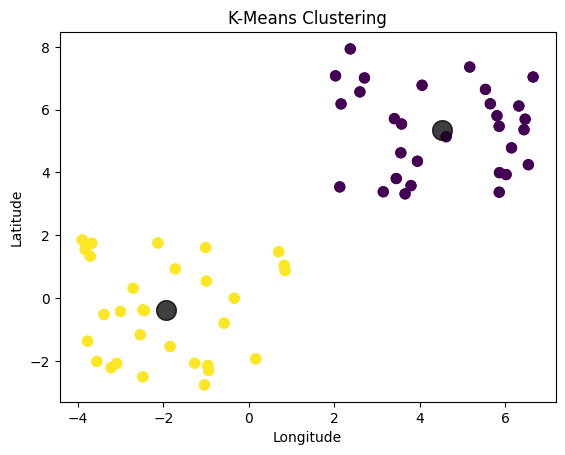

<module 'matplotlib.pyplot' from 'c:\\Users\\ajinkya\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [146]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)